In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pingouin
import pingouin as pg
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

In [2]:
df = pd.read_csv("/Users/yunfanliu/Desktop/INF2178_A4_data.csv")#read the data with currect path
print(df.shape) #check the shape of raw data
df = df[['Subject ID','Group','Visit','M/F','MMSE','nWBV']]# choose the necessary columns 
df.head()

(294, 16)


,Subject ID,Group,Visit,M/F,MMSE,nWBV
0,OAS2_0001,Nondemented,1,M,27.0,0.696
1,OAS2_0001,Nondemented,2,M,30.0,0.681
2,OAS2_0002,Demented,1,M,23.0,0.736
3,OAS2_0002,Demented,2,M,28.0,0.713
4,OAS2_0004,Nondemented,1,F,28.0,0.710


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  294 non-null    object 
 1   Group       294 non-null    object 
 2   Visit       294 non-null    int64  
 3   M/F         294 non-null    object 
 4   MMSE        293 non-null    float64
 5   nWBV        294 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.9+ KB


Based on the statistical summary of the data

- The dataset has a total of 294 entries with 6 features .
- One feature is recognized as integer type (int64), 2 features are recognized as float types, 3 features are recognized as object types
- There is one missing values in MMSE, I will use the mean value to fill in the null value of MMSE.

In [4]:
mmse_mean = df['MMSE'].mean()
df['MMSE'] = df['MMSE'].fillna(mmse_mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  294 non-null    object 
 1   Group       294 non-null    object 
 2   Visit       294 non-null    int64  
 3   M/F         294 non-null    object 
 4   MMSE        294 non-null    float64
 5   nWBV        294 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.9+ KB


## EDA

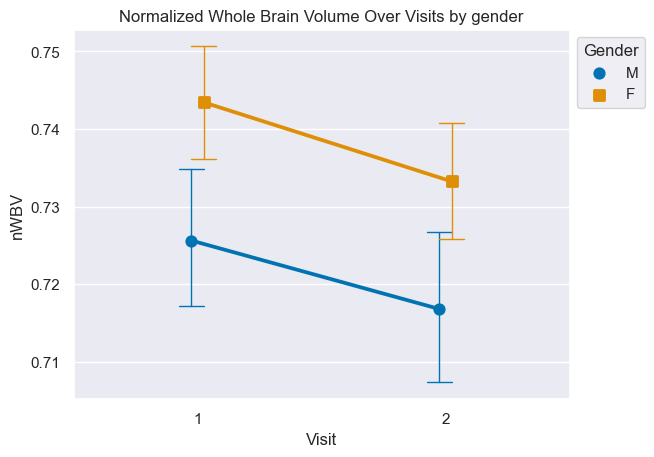

In [5]:
# Shows how the standardized whole brain volume of subjects in different gender with the number of visits
sns.set()
model1_plot = sns.pointplot(data=df, x='Visit', y='nWBV', hue='M/F', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')
model1_plot.set_title('Normalized Whole Brain Volume Over Visits by gender')
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The image shows that between the two visits, there is a downward trend in nWBV for both males and females, with a particularly noticeable decrease in females during the second visit, which narrows the gap between the two genders; moreover, the error bars are relatively longer in the second visit, indicating a greater degree of internal variability.

In [6]:
df.groupby(['Visit', 'M/F'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit M/F            
1     F    0.74  0.04
      M    0.73  0.04
2     F    0.73  0.04
      M    0.72  0.04

Overall, from the first to the second visit, the nWBV decreased across all genserd. Additionally, the standard deviation remained relatively stable for all groups across both visits, indicating that the variability of the nWBV measurements within gender did not change significantly between the two visits.

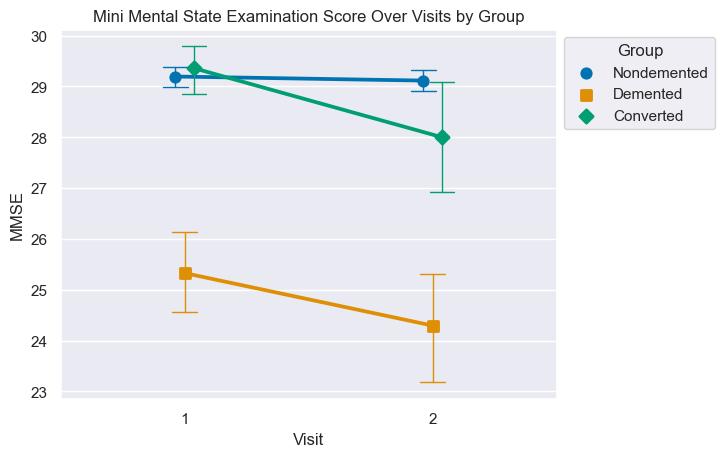

In [7]:
# Shows how the Mini Mental State Examination Score of subjects in different group with the number of visits
sns.set()
model1_plot = sns.pointplot(data=df, x='Visit', y='MMSE', hue='Group', dodge=True, markers=['o', 's','D'],
	      capsize=.1, errwidth=1, palette='colorblind')
model1_plot.set_title('Mini Mental State Examination Score Over Visits by Group')
plt.legend(title='Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The chart illustrates that for the MMSE scores, the 'Nondemented' group experienced a slight decrease, while the 'Demented' group and the 'Converted' group showed significant declines. Additionally, the 'Demented' group and the 'Converted' group displayed larger error bars during the second visit, indicating increased internal variability within these groups.

In [8]:
df.groupby(['Visit', 'Group'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                   
1     Converted    29.36  0.93
      Demented     25.33  3.32
      Nondemented  29.19  0.85
2     Converted    28.00  2.09
      Demented     24.29  4.38
      Nondemented  29.11  0.96

Overall, from the first to the second visit, the MMSE decreased across all group. Additionally, the variability of the MMSE measurements of the 'Demented' group and the 'Converted' group had significant changes.

# Mixed-Effects ANOVA

## Mixed-design ANOVA Model 1

1. For Gender:
   - H0 : There is no difference in nWBV among the different gender.
   - H1: There is a difference in nWBV between genders.
2. For Visit:
   - H0 : There is no change in nWBV across the different visits.
   - H1: There is a change in nWBV following at least one visit.
3. For the Interaction effect (Group*Visit):
   - H0: There is no interaction effect of gender and visit on nWBV.
   - H1: There is an interaction effect of gender and visit on nWBV.

In [9]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='M/F', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
M/F          0.021      1    142  0.021   8.030    0.005  0.054  nan
Visit        0.007      1    142  0.007  93.305    0.000  0.397    1.000
Interaction  0.000      1    142  0.000   0.621    0.432  0.004  nan



The gender effect  shows F=8.030, p=0.005<0.05, indicating that we have sufficient evidence to reject the null hypothesis, i.e there is no difference in nWBV between the different gender.
The visit effect shows F=93.305, p<0.001, indicating that we have sufficient evidence to reject the null hypothesis, i.e. there is no change in nWBV across the different gender.
The interaction effect (Gender*Visit) shows F=0.621, p=0.432 > 0.05, indicating that we do not have sufficient evidence to reject the null hypothesis, i.e.there is no interaction effect of gender and visit on nWBV.
Eps: was used for the Mauchly's test for the visit effect, which yielded a result of 1.000, implying that the assumption of homogeneity of variances is satisfied.

In [10]:
#Post Hoc Tests
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='M/F',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast     Visit    A    B    Paired    Parametric        T      dof  alternative      p-unc                 BF10    hedges
-----------  -------  ---  ---  --------  ------------  -----  -------  -------------  -------  -------------------  --------
Visit        -        1    2    True      True          9.672  143.000  two-sided        0.000  225800000000000.000     0.255
M/F          -        F    M    False     True          2.821  122.930  two-sided        0.006                6.506     0.478
Visit * M/F  1        F    M    False     True          2.974  124.056  two-sided        0.004                9.607     0.502
Visit * M/F  2        F    M    False     True          2.608  122.876  two-sided        0.010                3.902     0.442



/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nc

Between visits, the p-value is less than 0.001, indicating that we have sufficient evidence to reject the null hypothesis, which suggests that there is a significant change in nWBV between the two visits.
Between genders, the p-value is less than 0.05, indicating that there is a significant difference in nWBV between genders.
For the interaction effect between genders at Visit 1 and Visit 2, the p-value is less than 0.05, indicating that the influence of gender and number of visits on nWBV is not independent but interactive.

## Mixed-design ANOVA model2

1. For Group:
   - H0 : There is no difference in MMSE scores between the different groups of subjects.
   - H1: There is a significant difference in MMSE scores between at least two groups of subjects.
2. For Visit:
   - H0 :  There is no change in MMSE scores across the different visits for subjects.
   - H1: There is a significant change in MMSE scores at least following one visit for subjects.
3. For the Interaction effect (Group*Visit):
   - H0: There is no interaction effect between group and visit on MMSE scores.
   - H1:  There is a significant interaction effect between group and visit on MMSE scores.

In [11]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1322.017      2    141  661.009  56.100    0.000  0.443  nan
Visit          21.528      1    141   21.528   8.525    0.004  0.057    1.000
Interaction    16.204      2    141    8.102   3.208    0.043  0.044  nan



The group effect shows F=56.100, p<0.001, indicating that we have sufficient evidence to reject the null hypothesis, i.e there is no difference in MMSE scores between the different groups of subjects. The visit effect shows F=8.525, p<0.05, indicating that we have sufficient evidence to reject the null hypothesis, i.e. thereis no change in MMSE scores across the different visits for subjects. The interaction effect (Group*Visit) shows F=3.208, p<0.05, indicating that we have sufficient evidence to reject the null hypothesis, i.e.there is no interaction effect between group and visit on MMSE scores. Eps: was used for the Mauchly's test for the visit effect, which yielded a result of 1.000, implying that the assumption of homogeneity of variances is satisfied.

In [12]:
#Post Hoc Tests
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           2.876  143.000  two-sided        0.005               4.793     0.159
Group          -        Converted  Demented     False     True           6.745   50.480  two-sided        0.000         2189000.000     1.164
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.512   65.514  two-sided        0.000  33060000000000.000    -1.745
Visit * Group  1        Converted  Demented     False     True           8.076   60.165  two-sided        0.000       447900000.000

/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nc

The comparison between visits shows a p-value < 0.05, indicating that there is a significant change in MMSE scores with the number of visits.
The comparison between different groups reveals significant differences in MMSE scores between the 'Demented' group and both the 'Nondemented' and 'Converted' groups with a p-value<0.001.
The comparison of the interaction effect between group and number of visits shows that there is a significant interaction between the 'Demented' group and both the 'Nondemented' and 'Converted' groups with a p-value<0.001.

# Statistical Power Analysis Plot

Sample size/Number needed in each group: 45.451


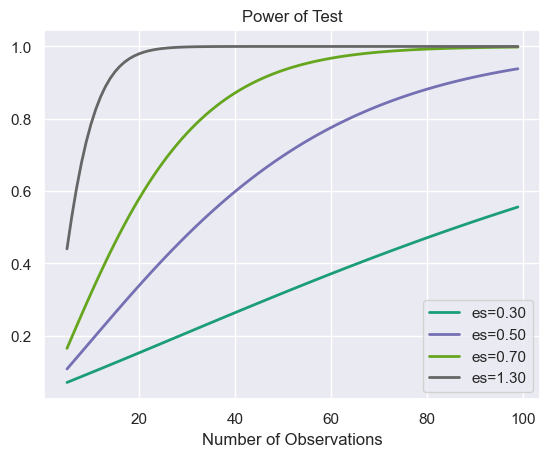

In [13]:
# statistical power for t-tests
# Parameters for the power analysis
obj = TTestIndPower()
effect_size = 0.7 
alpha = 0.05      
power = 0.91      

# perform power analysis to find sample size
sample_size = obj.solve_power(effect_size=effect_size, alpha=alpha, power=power,ratio=1, alternative='two-sided')
print('Sample size/Number needed in each group: {:.3f}'.format(sample_size))

#power curves
# power analysis varying parameters
effect_sizes = np.array([0.3,0.5,0.7,1.3])
sample_sizes = np.array(range(5, 100))
# plot power curves
obj.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)

plt.show()

With the given parameters, the required sample size for each group is 45.451. This means that to achieve a statistical power of 91% and to detect an effect size of 0.7, each group would need at least about 46 samples; moreover, the curves for effect sizes clearly demonstrate that an increase in sample size has a significant impact on increasing the power of the test.